## PS4 ## 
### Yuqian Gong ###

## 1 ##

### (a) ###

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [38]:
auto = pd.read_csv("Auto.csv", na_values = {"horsepower":["?"]})

### (b) ###

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2d9aa8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c2f0fc4a8>]], dtype=object)

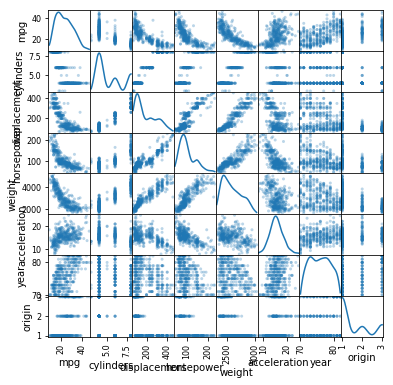

In [91]:
from pandas.plotting import scatter_matrix
auto.dropna(inplace = True)
quant_var = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
scatter_matrix(auto[quant_var], alpha = 0.3, figsize = (6, 6), diagonal = 'kde')

### (c) ###

In [35]:
auto[quant_var].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (d) ###

In [66]:
import statsmodels.api as sm
auto["const"] = 1
exog_var = ["const", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
reg1 = sm.OLS(endog=auto["mpg"], exog = auto[exog_var], missing = "drop")
results = reg1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        20:23:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(i)The coefficients for variables displacement, weight, year and origin are statistically significant
at the 1% level.
(ii)The coefficient for variable acceleration is not statistically significant at the 10% level.
(iii)The estimated coefficient $\hat{\beta_{6}}$ of variable year means that when holding other variables constant,
if the vehicle is one year younger, then the vehicle can run about another 0.75 miles per gallon.


### (e) ###

The three variables that look most likely to have a nonlinear relationship with $mpg_{i}$ is weight, horsepower,
and displacement. 

In [133]:

auto["weight_sqr"] = auto["weight"] ** 2
auto["horsepower_sqr"] = auto["horsepower"] ** 2
auto["displacement_sqr"] = auto["displacement"] ** 2
auto["acceleration_sqr"] = auto["acceleration"] ** 2
exog_var2 = ["const", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin",\
            "weight_sqr", "horsepower_sqr", "displacement_sqr", "acceleration_sqr" ]
reg2 = sm.OLS(endog = auto["mpg"], exog = auto[exog_var2], missing = "drop")
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        00:34:56   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1084      6.696      3.003      0.003       6.943      33.274
cylinders            0.2519      0.326      0.773      0.440      -0.389       0.893
displacement        -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower          -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight              -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration        -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year                 0.7810      0.045     17.512      0.000       0.693       0.869
origin               0.6104      0.263      2.320      0.021       0.093       1.128
weight_sqr        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
horsepower_sqr       0.0004      0.000      2.943      0.003       0.000       0.001
displacement_sqr  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
acceleration_sqr     0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(ii) The adjusted R-squared is better than before, which is 0.866 in this case.
(iii) The p-value of the variable displacement changes from 0.008 to 0.408. So the variable displacement is less
statistically significant. Its coefficient changes from positive to negative number and the absolute value is smaller.
The coefficient of its squared term is very small. 
(iv) The statistical significance of the cylinders variable becomes less significant.


In [68]:
exog_value = [1, 6, 200, 100, 3100, 15.1, 99, 1, 3100 ** 2, 100 **2, 200 ** 2, 15.1 **2 ]
results2.predict(exog = exog_value)

array([ 38.7321111])

So the predicted miles per gallon is about 38.73

## 2 ##

### (a) ###

In [55]:

dist_1 = math.sqrt(0 ** 2 + 3 ** 2 + 0 ** 2)
dist_2 = math.sqrt(2 ** 2 + 0 ** 2 + 0 ** 2)
dist_3 = math.sqrt(0 ** 2 + 1 ** 2 + 3 ** 2)
dist_4 = math.sqrt(0 ** 2 + 1 ** 2 + 2 ** 2)
dist_5 = math.sqrt((-1) ** 2 + 0 ** 2 + 1 ** 2)
dist_6 = math.sqrt(1 ** 2 + 1 ** 2 + 1 **2 )
print("The distance between each observation and the test point is", dist_1,dist_2, dist_3, dist_4, dist_5, dist_6)

The distance between each observation and the test point is 3.0 2.0 3.1622776601683795 2.23606797749979 1.4142135623730951 1.7320508075688772


### (b) ###
When k = 1, the nearest point to the test point is observation 5 and its response variable is green. Therefore, our KNN prediction is also green. 

### (c) ###
When k =3, the three nearest point to the test point is observation 2, observation 5 and observation 6. Among three, two of their response variables are red and only one response variable is green. Therefore, our KNN prediction is red.

### (d) ### 
would expect the best value for K to be small as the boundary for K is more nonlinear if K is small.


### (e) ###

In [65]:
from sklearn.neighbors import KNeighborsClassifier
x_array = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y_array = np.array(["red", "red", "red", "green", "green", "red"])
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_array, y_array) #.score(np.array([[0,0,0]]), np.array([1]))
pred = knn.predict(np.array([[0, 0, 0]]))
pred

array(['green'],
      dtype='<U5')

So the predicted class is green

## 3 ##

### (a) ###

In [87]:
mpg_median = np.median(auto["mpg"])
auto["mpg_condition"] = auto["mpg"] > mpg_median
auto["mpg_dummy"] = pd.get_dummies(auto["mpg_condition"], drop_first = True)
reg3 = sm.Logit(endog = auto["mpg_dummy"], exog = auto[exog_var], missing = "drop")
results3 = reg3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/Users/Nancygong/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              mpg_dummy   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                    -inf
Time:                        23:43:13   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -4942.6
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -22.7150      6.140     -3.700      0.000     -34.749     -10.681
cylinders       -0.0633      0.437     -0.145      0.885      -0.919       0.792
displacement    -0.0002      0.013     -0.017      0.987      -0.026       0.025
horsepower      -0.0399      0.025     -1.618      0.106      -0.088       0.008
weight          -0.0048      0.001     -3.935      0.000      -0.007      -0.002
acceleration    -0.0178      0.141     -0.126      0.899      -0.294       0.258
year             0.5196      0.084      6.169      0.000       0.355       0.685
origin           0.4990      0.360      1.385      0.166      -0.207       1.205
================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

From the table we can see that the regressors that are statistically significant at the 5% level include weight and
year. 

### (b) ###

In [95]:
x = auto.ix[:, (13, 1, 2, 3, 4, 5, 6, 7)].values
y = auto["mpg_dummy"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 10)

### (c) ###

In [124]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
coef = LogReg.coef_
intercept = LogReg.intercept_

In [121]:
print("The estimated coefficients are {}, {}, {}, {}, {}, {} and {}".format(coef[0, 1], coef[0, 2], coef[0, 3], \
                                                           coef[0, 4], coef[0, 5], coef[0, 6], coef[0, 7]))

The estimated coefficients are -0.361330918281304, 0.005580285707301166, -0.048364197616954575, -0.005017432719812287, -0.23644647506223992, 0.30602457553459655 and -0.0036374804575100275


In [123]:
print("The intercept is {}".format(intercept[0]))

The intercept is -0.050089000135223403


### (d) ###

In [127]:
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[89, 16],
       [10, 81]])

In [131]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.85      0.87       105
          1       0.84      0.89      0.86        91

avg / total       0.87      0.87      0.87       196



It seems that the model predict low mpg better as the precision is 0.9 compared with 0.94 for high mpg